**Karl Darwin Ombele Ndassebe**


**ANÁLISE PREDITIVA DE SCORE DE CRÉDITO COM PYHTON: Modelo para Decisões Financeiras**

*13 de julho, 2023*



**1. INTRODUÇÃO**

O score de crédito é uma métrica crucial para as instituições financeiras avaliarem a probabilidade de os clientes honrarem seus compromissos financeiros. Uma classificação precisa do score de crédito permite tomar decisões mais informadas sobre a concessão de crédito, minimizando os riscos de inadimplência e maximizando os lucros.

Este trabalho visa analisar os dados dos clientes de uma instituição financeira e desenvolver uma solução de inteligência artificial. O objetivo é construir um modelo preditivo capaz de classificar automaticamente o score de crédito dos clientes em três categorias distintas (Ruim, Padrão, Bom).

A implementação da solução será realizada utilizando Python, uma linguagem robusta e amplamente utilizada para análise de dados e machine learning. O processo incluirá análise exploratória para compreender a distribuição dos dados, pré-processamento para adequar os dados brutos ao modelo, seleção de features relevantes, treinamento de modelos com diversos algoritmos de machine learning, avaliação de desempenho utilizando métricas apropriadas, criação de visualizações para apresentar os resultados e previsão do score de crédito para novos clientes utilizando o modelo desenvolvido.

**2. CARREGAMENTO E TRATAMENTO DOS DADOS**

**2.1 Importação das bibliotecas necessárias**

O projeto se inicia com a importação de todas as bibliotecas necessárias para as fases iniciais de exploração e transformação dos dados.

In [1]:
# Bibliotecas necessárias
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)

**2.2 Importação de Dados**

In [2]:
# Carregar os dados
tabela = pd.read_csv("clientes.csv")
display(tabela)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


**2.3 Tratamento dos Dados**

In [3]:
# Verificar valores vazios e tipos de dados
print(tabela.info())
print(tabela.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

Após a verificação dos valores vazios e tipos de dados no conjunto de dados fornecido, constatou-se que não há valores nulos em nenhuma das colunas e que os tipos de dados estão apropriados para a análise proposta. Todos os campos estão preenchidos e os tipos de dados foram interpretados corretamente pelo Pandas, conforme especificado no resumo da estrutura do DataFrame.

Com base nessa análise inicial, não há necessidade imediata de tratamento adicional para valores ausentes ou correção de tipos de dados. Isso indica que podemos prosseguir diretamente para a etapa de análise exploratória e modelagem dos dados, utilizando as informações disponíveis de forma direta e eficaz.

**3. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)**

Antes de prosseguir com a modelagem, será realizada uma análise exploratória dos dados para entender melhor as características e verificar a distribuição dos scores de crédito.

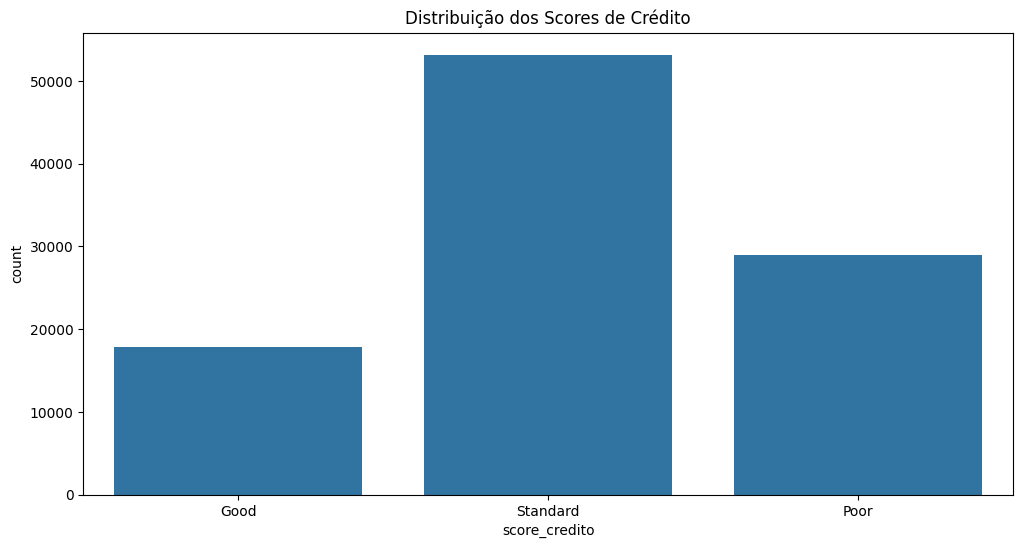

In [4]:
# Distribuição dos scores de crédito
plt.figure(figsize=(12, 6))
sns.countplot(data=tabela, x='score_credito')
plt.title('Distribuição dos Scores de Crédito')
plt.show()


A análise da distribuição dos scores de crédito, conforme ilustrado no gráfico, revela que a maioria dos clientes da instituição financeira está classificada na categoria "Standard". Esse grupo representa mais da metade do total de clientes analisados. Em seguida, temos a categoria "Poor", que é a segunda mais frequente, indicando um número significativo de clientes com score de crédito considerado baixo. Por último, a categoria "Good" apresenta o menor número de clientes, refletindo uma menor proporção de clientes com score de crédito elevado.

**4. PRÉ-PROCESSAMENTO DOS DADOS**


In [5]:
# Codificação das variáveis categóricas
codificador = LabelEncoder()

for coluna in tabela.columns:
    if tabela[coluna].dtype == "object" and coluna != "score_credito":
        tabela[coluna] = codificador.fit_transform(tabela[coluna])

# Verificando se todas as colunas foram modificadas
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int64  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int64  
 13  divida_total              100000 non-null  fl

O pré-processamento dos dados foi realizado através da codificação das variáveis categóricas, seguido de uma verificação das modificações realizadas. Primeiramente, é instanciado um *LabelEncoder*, um codificador utilizado para transformar variáveis categóricas em valores numéricos. Em seguida, percorre-se todas as colunas do dataframe *tabela* utilizando um loop *for*. Dentro do loop, verifica-se se o tipo de dado da coluna é *object*, o que indica que a coluna contém variáveis categóricas, com exceção da coluna *score_credito*, que é a variável alvo e não deve ser codificada nesse momento.

Para cada coluna categórica identificada, o *LabelEncoder* transforma os valores categóricos em valores numéricos. Após a conclusão do loop, a função *print(tabela.info())* é utilizada para exibir informações detalhadas sobre o dataframe, incluindo o número de entradas não-nulas (non-null count) para cada coluna, o tipo de dado de cada coluna e o total de memória utilizado pelo dataframe.

O resultado mostra que todas as variáveis categóricas foram devidamente transformadas em valores numéricos. 

**5. SELEÇÃO DE FEATURES E DIVISÃO DOS DADOS**

In [6]:
# Seleção de features e target
x = tabela.drop(["score_credito", "id_cliente"], axis=1)
y = tabela["score_credito"]

# Divisão dos dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

 Foi realizado nessa etapa procedimentos essenciais na preparação dos dados para modelagem, assegurando a qualidade e a eficácia do modelo preditivo. Primeiramente, é realizada a seleção de features e da variável alvo (target). Nesta etapa, a variável *x* é criada a partir do dataframe *tabela*, removendo as colunas *score_credito* e *id_cliente*. A coluna *score_credito* é excluída porque representa a variável alvo que queremos prever, enquanto a coluna *id_cliente* é removida por ser uma variável identificadora única que não contém informações úteis para a modelagem preditiva, não influenciando o score de crédito dos clientes. Em seguida, a variável *y* é definida como a coluna *score_credito*, estabelecendo a variável que o modelo irá tentar prever.

Na sequência, ocorre a divisão dos dados em conjuntos de treino e teste. Utilizando a função *train_test_split* do *scikit-learn*, *x* e *y* são divididos em *x_treino, x_teste, y_treino e y_teste*. Especificamente, 30% dos dados são designados para o conjunto de teste, enquanto os 70% restantes são destinados ao treinamento do modelo. A definição de *random_state=1* assegura que a divisão dos dados seja reprodutível, garantindo que cada vez que o código for executado com a mesma semente aleatória, a divisão dos dados será a mesma.

**6. TREINAMENTO DE MÚLTIPLOS MODELOS**

In [7]:
# Definir modelos
modelos = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Treinamento e avaliação dos modelos
resultados = {}
for nome, modelo in modelos.items():
    modelo.fit(x_treino, y_treino)
    previsoes = modelo.predict(x_teste)
    acc = accuracy_score(y_teste, previsoes)
    resultados[nome] = acc
    print(f"{nome}: {acc:.4f}")

# Exibir resultados
resultados_df = pd.DataFrame.from_dict(resultados, orient='index', columns=['Accuracy'])
print(resultados_df)

Random Forest: 0.8263
KNN: 0.7324
Gradient Boosting: 0.7081
                   Accuracy
Random Forest      0.826333
KNN                0.732400
Gradient Boosting  0.708067


A acurácia é uma métrica que indica a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.

Os resultados obtidos foram os seguintes: o modelo Random Forest apresentou a mais alta acurácia, aproximadamente 82.73%, seguido pelo KNN com aproximadamente 73.24%, e o Gradient Boosting com aproximadamente 70.81%.

Com base nos resultados e considerando uma acurácia superior e menor complexidade computacional, o Random Forest é uma escolha sólida neste caso. Ele obteve a maior acurácia entre os modelos testados e geralmente é robusto em diferentes tipos de conjuntos de dados.

In [8]:
# Selecionar o melhor modelo (Random Forest)
melhor_modelo = RandomForestClassifier()
melhor_modelo.fit(x_treino, y_treino)
previsoes = melhor_modelo.predict(x_teste)

# Avaliação detalhada
print("Classification Report:\n", classification_report(y_teste, previsoes))
print("Confusion Matrix:\n", confusion_matrix(y_teste, previsoes))


Classification Report:
               precision    recall  f1-score   support

        Good       0.79      0.78      0.79      5327
        Poor       0.80      0.84      0.82      8683
    Standard       0.84      0.83      0.83     15990

    accuracy                           0.82     30000
   macro avg       0.81      0.82      0.81     30000
weighted avg       0.82      0.82      0.82     30000

Confusion Matrix:
 [[ 4169    31  1127]
 [   66  7304  1313]
 [ 1039  1746 13205]]


Os resultados mostram que o modelo tem uma boa performance geral, com uma precisão média de cerca de 83%. Ele parece ser particularmente bom em prever a classe "Standard" de score de crédito, com precisão e recall mais altos em comparação com as outras classes. Isso sugere que o modelo Random Forest está bem ajustado para o problema em questão, mas é sempre importante considerar outras métricas e o contexto específico do negócio ao interpretar esses resultados para tomadas de decisão.

**7. IMPORTÂNCIA DAS FEATURES**

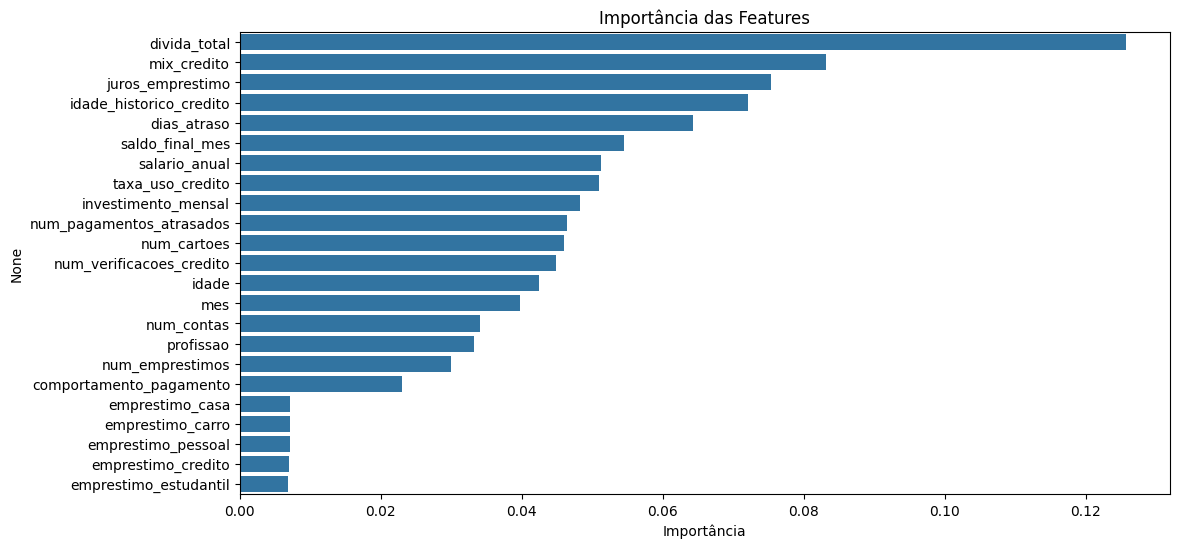

In [9]:
# Importância das features
importancia = pd.DataFrame(melhor_modelo.feature_importances_, index=x.columns, columns=['Importância']).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=importancia.Importância, y=importancia.index)
plt.title('Importância das Features')
plt.show()

A identificação das features mais importantes no modelo é essencial para compreender quais variáveis têm maior impacto na predição do score de crédito dos clientes. Ao analisar as barras mais altas do gráfico de importância das features, é possível identificar as variáveis que exercem maior influência no modelo. No caso do gráfico fornecido, as features mais importantes são: divida total, juros_emprestimo e mix_credito.

A feature "divida total" provavelmente representa o valor total da dívida do cliente, indicando sua capacidade de honrar compromissos financeiros, o que faz sentido como um fator determinante do score de crédito. A feature "juros_emprestimo" está relacionada à taxa de juros dos empréstimos dos clientes, influenciando diretamente sua capacidade de pagamento. Já a feature "mix_credito" pode indicar a diversificação do crédito do cliente, fator positivo para a capacidade de pagamento.

Ao interpretar a importância relativa das features, é essencial comparar as alturas das barras. As features no topo do gráfico contribuem significativamente mais para o modelo do que as features na base. Essa análise auxilia na seleção de variáveis ​​relevantes para o modelo, otimizando seu desempenho e fornecendo insights valiosos sobre os fatores que influenciam as previsões.

Além disso, a análise do gráfico revela que as características com menor influência para o modelo são "emprestimo_estudantil", "emprestimo_credito" e "emprestimo_caro". Essas variáveis, por terem pouca contribuição, podem ser consideradas menos relevantes para a predição do score de crédito, permitindo uma possível simplificação do modelo sem perda significativa de desempenho.

Compreender a importância das features não apenas melhora a performance do modelo, mas também proporciona uma visão clara dos fatores que mais afetam o score de crédito, permitindo a tomada de decisões mais informadas e estratégias de negócios mais eficazes.

**8. PREVISÕES EM NOVOS CLIENTES**

In [10]:
# Carregar novos clientes
novos_clientes = pd.read_csv("novos_clientes.csv")
for coluna in novos_clientes.columns:
    if novos_clientes[coluna].dtype == "object" and coluna != "score_credito":
        novos_clientes[coluna] = codificador.fit_transform(novos_clientes[coluna])

# Fazer previsões
previsoes_novos = melhor_modelo.predict(novos_clientes)
print(previsoes_novos)

['Poor' 'Good' 'Standard']


Na última etapa do processo, carregamos um novo conjunto de dados contendo informações sobre novos clientes. Para garantir que o modelo possa fazer previsões adequadas, foi necessário pré-processar essas informações. Assim, as variáveis categóricas do novo conjunto de dados foram codificadas usando o mesmo codificador aplicado anteriormente nos dados de treinamento.

Em seguida, utilizamos o melhor modelo treinado, identificado como o modelo de Random Forest, para fazer previsões sobre o score de crédito desses novos clientes. As previsões resultantes indicaram que os novos clientes foram classificados nas categorias 'Poor' (Ruim), 'Good' (Bom) e 'Standard' (Padrão), respectivamente.

Essa abordagem permite que a empresa avalie rapidamente a pontuação de crédito de novos clientes usando um modelo previamente treinado e validado. Ao codificar consistentemente as variáveis categóricas, garantimos que as previsões são realizadas de maneira uniforme e precisa, alinhadas com o processo de modelagem original.

**Entre em Contato Comigo**

Caso tenha alguma dúvida, sugestão ou apenas queira trocar uma ideia sobre este projeto, não hesite em entrar em contato comigo!

**karldarwin248@gmail.com**

**https://www.linkedin.com/in/karldarwin**